In [ ]:
###libraries neeeded for the analysis are imported
import numpy as np
import pandas as pd
from math import log
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
##import libraries###
from sklearn.preprocessing import StandardScaler
# splitting data
from sklearn.model_selection import train_test_split
# data modelling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt


In [ ]:
#load my data####
df = pd.read_csv("/content/EV_mydata.csv")


In [ ]:
####check the first five rows
df.head()

,Reg. nr.,Fabrikant,Model,Variant,Første reg. dato,Stelnummer,Status,Type,Battery Capacity (kWh),EV type (BEV = 1 or PHEV =2),Avg consumption in a day (KWh),Distance driven in a day (km),Initial SOC (kWh),Socioeconomic Behavior Index
0,AZ32054,Audi,A3 Sportback E-Tron,SCUKBF1,17/04/2015,WAUZZZ8V8FA158118,Registreret,Personbil,8.8,2,3,15,7.202660,0
1,BY50250,Audi,A3 Sportback E-Tron,SCUKBF1,03/08/2015,WAUZZZ8VXGA008948,Registreret,Personbil,8.8,2,3,15,6.907677,4
2,BR97090,Audi,A3 Sportback E-Tron,SCUKBF1,07/11/2014,WAUZZZ8V9FA063177,Registreret,Personbil,8.8,2,3,15,7.185391,0
3,BY16022,Audi,A3 Sportback E-Tron,SCUKBF1,01/02/2016,WAUZZZ8V2GA099360,Registreret,Personbil,8.8,2,3,15,7.269912,2
4,NaN,Audi,A3 Sportback E-Tron,SCUKBF1,08/07/2015,WAUZZZ8V8GA006163,HarGennemførtRegistreringssyn,Personbil,8.8,2,3,15,7.242424,1


In [ ]:
##overview of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11088 entries, 0 to 11087
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Reg. nr.                        11081 non-null  object 
 1   Fabrikant                       11088 non-null  object 
 2   Model                           11088 non-null  object 
 3   Variant                         11087 non-null  object 
 4   Første reg. dato                11088 non-null  object 
 5   Stelnummer                      11088 non-null  object 
 6   Status                          11088 non-null  object 
 7   Type                            11088 non-null  object 
 8   Battery Capacity (kWh)          11088 non-null  float64
 9   EV type (BEV = 1 or PHEV =2)    11088 non-null  int64  
 10  Avg consumption in a day (KWh)  11088 non-null  int64  
 11  Distance driven in a day (km)   11088 non-null  int64  
 12  Initial SOC (kWh)               

In [ ]:
##Description of the DataFrame###
df.describe()

,Battery Capacity (kWh),EV type (BEV = 1 or PHEV =2),Avg consumption in a day (KWh),Distance driven in a day (km),Initial SOC (kWh),Socioeconomic Behavior Index
count,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000,11088.000000
mean,42.647466,1.178030,7.903950,39.519751,34.760626,2.000180
std,31.537945,0.382556,7.120696,35.603480,25.713564,1.147072
min,5.000000,1.000000,1.000000,5.000000,3.924817,0.000000
25%,20.000000,1.000000,4.000000,20.000000,16.330434,1.000000
50%,24.000000,1.000000,6.000000,30.000000,19.752067,2.000000
75%,85.000000,1.000000,9.000000,45.000000,68.517675,3.000000
max,100.000000,2.000000,80.000000,400.000000,82.862894,4.000000


In [ ]:
###shape of the DataFrame## shows 11088 observations with 14 attributes
df.shape

(11088, 14)

In [ ]:
df.columns#### the column name

Index(['Reg. nr.', 'Fabrikant', 'Model', 'Variant', 'Første reg. dato',
       'Stelnummer', 'Status', 'Type', 'Battery Capacity (kWh)',
       'EV type (BEV = 1 or PHEV =2)', 'Avg consumption in a day (KWh)',
       'Distance driven in a day (km)', 'Initial SOC (kWh)',
       'Socioeconomic Behavior Index'],
      dtype='object')

In [ ]:
#renaming the column names
df1 = df.rename (columns={'Reg. nr.': 'Reg_num',
                         'Battery Capacity (kWh)': 'Battery_capacity',
                         'Fabrikant': 'Manufacturer',
                         'Første reg. dato': 'Reg_year',
                         'Avg consumption in a day (KWh)': 'Energy_consump',
                         'Distance driven in a day (km)': 'Distance',
                         'EV type (BEV = 1 or PHEV =2)': 'EV_type'})


In [ ]:
df1

,Reg_num,Manufacturer,Model,Variant,Reg_year,Stelnummer,Status,Type,Battery_capacity,EV_type,Energy_consump,Distance,Initial SOC (kWh),Socioeconomic Behavior Index
0,AZ32054,Audi,A3 Sportback E-Tron,SCUKBF1,17/04/2015,WAUZZZ8V8FA158118,Registreret,Personbil,8.8,2,3,15,7.202660,0
1,BY50250,Audi,A3 Sportback E-Tron,SCUKBF1,03/08/2015,WAUZZZ8VXGA008948,Registreret,Personbil,8.8,2,3,15,6.907677,4
2,BR97090,Audi,A3 Sportback E-Tron,SCUKBF1,07/11/2014,WAUZZZ8V9FA063177,Registreret,Personbil,8.8,2,3,15,7.185391,0
3,BY16022,Audi,A3 Sportback E-Tron,SCUKBF1,01/02/2016,WAUZZZ8V2GA099360,Registreret,Personbil,8.8,2,3,15,7.269912,2
4,NaN,Audi,A3 Sportback E-Tron,SCUKBF1,08/07/2015,WAUZZZ8V8GA006163,HarGennemførtRegistreringssyn,Personbil,8.8,2,3,15,7.242424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,BT28589,Volvo,V60 D6 Awd Hybrid,GWAA,23/10/2014,YV1GWAA50F1240977,Registreret,Personbil,11.2,2,3,15,9.167022,4
11084,BM81204,Volvo,V60 D6 Awd Hybrid,GWAA,27/10/2014,YV1GWAA50F1241704,Registreret,Personbil,11.2,2,4,20,8.791589,3
11085,BT75995,Volvo,V60 D6 Awd Hybrid,GWAA,04/04/2013,YV1GWAA50D1133581,Registreret,Personbil,11.2,2,5,25,9.145043,1
11086,BE34788,Volvo,V60 D6 Awd Hybrid,GWAA,22/10/2014,YV1GWAA50F1241049,Registreret,Personbil,11.2,2,6,30,9.252615,4


In [ ]:
###I dropped the column because they are not relevant to my analysis####
df2 = df1.drop(['Stelnummer', 'Variant', 'Status', 'Type'], axis=1)



In [ ]:
df2.columns####new column

Index(['Reg_num', 'Manufacturer', 'Model', 'Reg_year', 'Battery_capacity',
       'EV_type', 'Energy_consump', 'Distance', 'Initial SOC (kWh)',
       'Socioeconomic Behavior Index'],
      dtype='object')

In [ ]:
df2.dropna(inplace=True) ####removing missing variables

In [ ]:
df2.isnull().sum()

Reg_num                         0
Manufacturer                    0
Model                           0
Reg_year                        0
Battery_capacity                0
EV_type                         0
Energy_consump                  0
Distance                        0
Initial SOC (kWh)               0
Socioeconomic Behavior Index    0
dtype: int64

In [ ]:
df2.head(10)

,Reg_num,Manufacturer,Model,Reg_year,Battery_capacity,EV_type,Energy_consump,Distance,Initial SOC (kWh),Socioeconomic Behavior Index
0,AZ32054,Audi,A3 Sportback E-Tron,17/04/2015,8.8,2,3,15,7.202660,0
1,BY50250,Audi,A3 Sportback E-Tron,03/08/2015,8.8,2,3,15,6.907677,4
2,BR97090,Audi,A3 Sportback E-Tron,07/11/2014,8.8,2,3,15,7.185391,0
3,BY16022,Audi,A3 Sportback E-Tron,01/02/2016,8.8,2,3,15,7.269912,2
7,BT60025,Audi,A3 Sportback E-Tron,31/10/2017,8.8,2,3,15,7.108608,4
8,BT60025,Audi,A3 Sportback E-Tron,31/10/2017,8.8,2,3,15,7.247420,2
9,BT50532,Audi,A3 Sportback E-Tron,07/08/2014,8.8,2,3,15,7.291935,2
10,BT50532,Audi,A3 Sportback E-Tron,07/08/2014,8.8,2,3,15,7.202660,2
11,BS84742,Audi,A3 Sportback E-Tron,07/08/2014,8.8,2,3,15,6.907677,2
12,BS52080,Audi,A3 Sportback E-Tron,05/02/2016,8.8,2,3,15,7.185391,1


In [ ]:
EV_counts = df2['EV_type'].value_counts()####count of EVtype, where 1=battery electric, 2=hybrid
print(EV_counts)



1    9113
2    1968
Name: EV_type, dtype: int64


In [ ]:
###since I'm only dealing with EVs, I dropped the hybrid
df3 = df2.drop(df2[df2.EV_type == 2].index)



In [ ]:
df3####new DataFrame

,Reg_num,Manufacturer,Model,Reg_year,Battery_capacity,EV_type,Energy_consump,Distance,Initial SOC (kWh),Socioeconomic Behavior Index
39,DW54071,Bellier,H3,26/04/2011,5.0,1,1,5,4.143145,2
40,DW54049,Bellier,H3,26/04/2011,5.0,1,2,10,4.092420,0
41,DW54070,Bellier,H3,26/04/2011,5.0,1,2,10,3.924817,2
42,DW54067,Bellier,H3,26/04/2011,5.0,1,3,15,4.082608,2
43,DW54069,Bellier,H3,26/04/2011,5.0,1,3,15,4.130632,4
...,...,...,...,...,...,...,...,...,...,...
10907,AM50157,Volkswagen,E-Up!,02/05/2014,20.0,1,16,80,16.311567,1
10908,AP43284,Volkswagen,E-Up!,01/10/2014,20.0,1,16,80,16.155927,1
10909,AS42175,Volkswagen,E-Up!,19/11/2013,20.0,1,16,80,16.471408,1
10910,AY46417,Volkswagen,E-Golf,29/10/2015,24.2,1,19,95,20.052820,1


After removing missing variables and dropping EV_type =2, I have 9113 observations and 10attributes left.

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9113 entries, 39 to 10911
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Reg_num                       9113 non-null   object 
 1   Manufacturer                  9113 non-null   object 
 2   Model                         9113 non-null   object 
 3   Reg_year                      9113 non-null   object 
 4   Battery_capacity              9113 non-null   float64
 5   EV_type                       9113 non-null   int64  
 6   Energy_consump                9113 non-null   int64  
 7   Distance                      9113 non-null   int64  
 8   Initial SOC (kWh)             9113 non-null   float64
 9   Socioeconomic Behavior Index  9113 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 783.1+ KB


For the energy consumption, I categorized it into low, medium and high energy levels.
why? This is because it is easier to eavaluate different models when electric vehicles are categorised according to their energy levels. It is also simpler to determine which cars are more energy-efficient and consume less energy per unit of distance travelled.

In [ ]:
# Define a function to map energy levels
def map_energy_level(value):
    if value <= 20:
        return 0
    elif value <= 50:
        return 1
    else:
        return 2
#  function to create a new column with energy levels
df3['Energy_Level'] = df3['Energy_consump'].apply(map_energy_level)

df3['Energy_Level']

39       0
40       0
41       0
42       0
43       0
        ..
10907    0
10908    0
10909    0
10910    0
10911    0
Name: Energy_Level, Length: 9113, dtype: int64

In [ ]:
df3['Energy_Level'].value_counts()

0    8464
1     615
2      34
Name: Energy_Level, dtype: int64

In [ ]:
df3

,Reg_num,Manufacturer,Model,Reg_year,Battery_capacity,EV_type,Energy_consump,Distance,Initial SOC (kWh),Socioeconomic Behavior Index,Energy_Level
39,DW54071,Bellier,H3,26/04/2011,5.0,1,1,5,4.143145,2,0
40,DW54049,Bellier,H3,26/04/2011,5.0,1,2,10,4.092420,0,0
41,DW54070,Bellier,H3,26/04/2011,5.0,1,2,10,3.924817,2,0
42,DW54067,Bellier,H3,26/04/2011,5.0,1,3,15,4.082608,2,0
43,DW54069,Bellier,H3,26/04/2011,5.0,1,3,15,4.130632,4,0
...,...,...,...,...,...,...,...,...,...,...,...
10907,AM50157,Volkswagen,E-Up!,02/05/2014,20.0,1,16,80,16.311567,1,0
10908,AP43284,Volkswagen,E-Up!,01/10/2014,20.0,1,16,80,16.155927,1,0
10909,AS42175,Volkswagen,E-Up!,19/11/2013,20.0,1,16,80,16.471408,1,0
10910,AY46417,Volkswagen,E-Golf,29/10/2015,24.2,1,19,95,20.052820,1,0


EDA(EXPLORATORY DATA ANALYSIS)


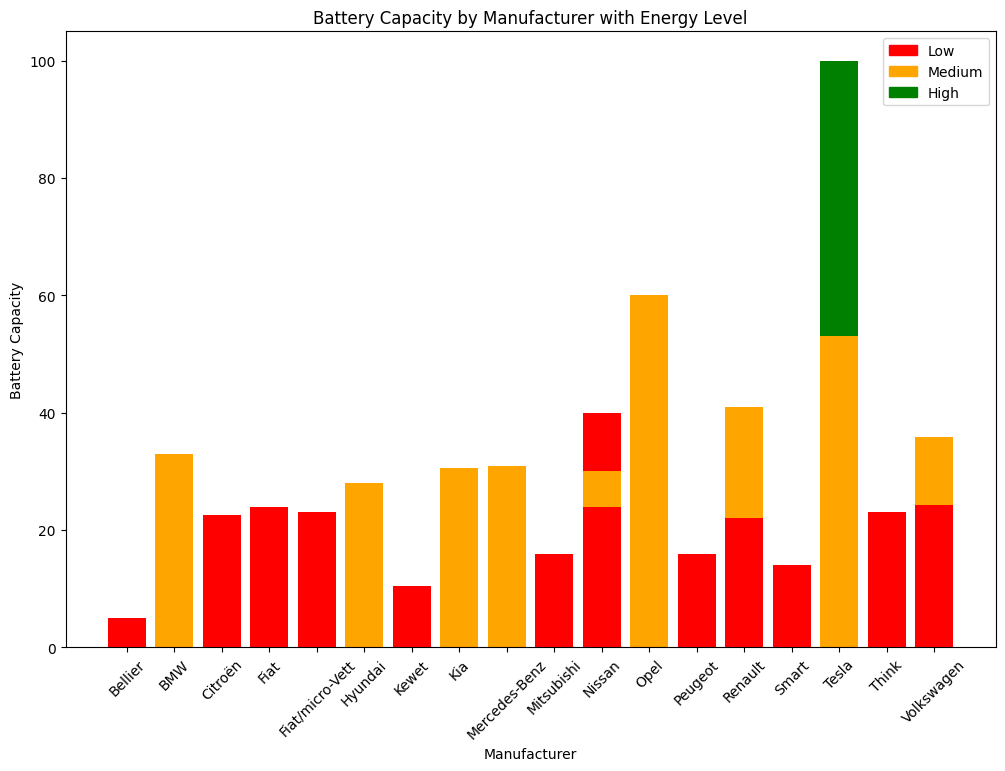

In [ ]:
import matplotlib.pyplot as plt

# colormap based on the 'Energy_Level' values
plt.figure(figsize=(12, 8))
colormap = ['red', 'orange', 'green']

# Plot of the attributes using target as the legend
bars = plt.bar(df3['Manufacturer'], df3['Battery_capacity'], color=[colormap[level] for level in df3['Energy_Level']])

# Adding labels and title to the plot
plt.xlabel('Manufacturer')
plt.ylabel('Battery Capacity')
plt.title('Battery Capacity by Manufacturer with Energy Level')
plt.xticks(rotation=45)

#custom legend
energy_levels = ['Low', 'Medium', 'High']
legend_labels = [plt.Rectangle((0, 0), 1, 1, color=colormap[i]) for i in range(len(energy_levels))]

plt.legend(legend_labels, energy_levels)

plt.show()


the above analysis shows the different energy levels of manufacturer with battery capacity. The graph revealed that Tesla  has both medium an high energy consumption.

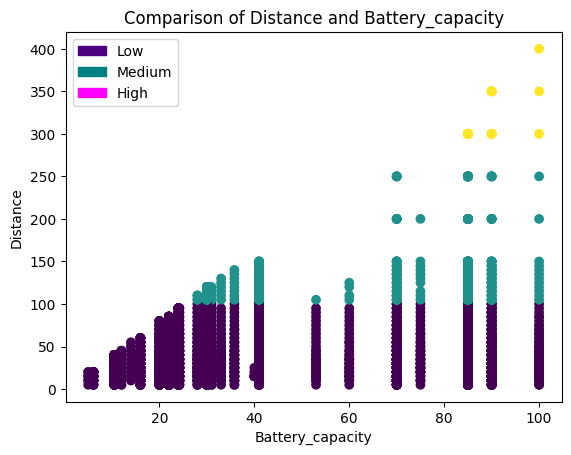

In [ ]:
 #Plotting the attributes and using target as the legend
colormap = ['indigo', 'teal', 'magenta']

plt.scatter(df3['Battery_capacity'], df3['Distance'], c=df3['Energy_Level'])

# Adding labels and title to the plot
plt.xlabel('Battery_capacity')
plt.ylabel('Distance')
plt.title('Comparison of Distance and Battery_capacity')

# Adding a legend
energy_levels = ['Low', 'Medium', 'High']
legend_labels = [plt.Rectangle((0, 0), 1, 1, color=colormap[i]) for i in range(len(energy_levels))]
plt.legend(legend_labels, energy_levels)

# Displaying the plot
plt.show()

The above graph shows that the more the distance covered, the more energy the vehicle consumed.

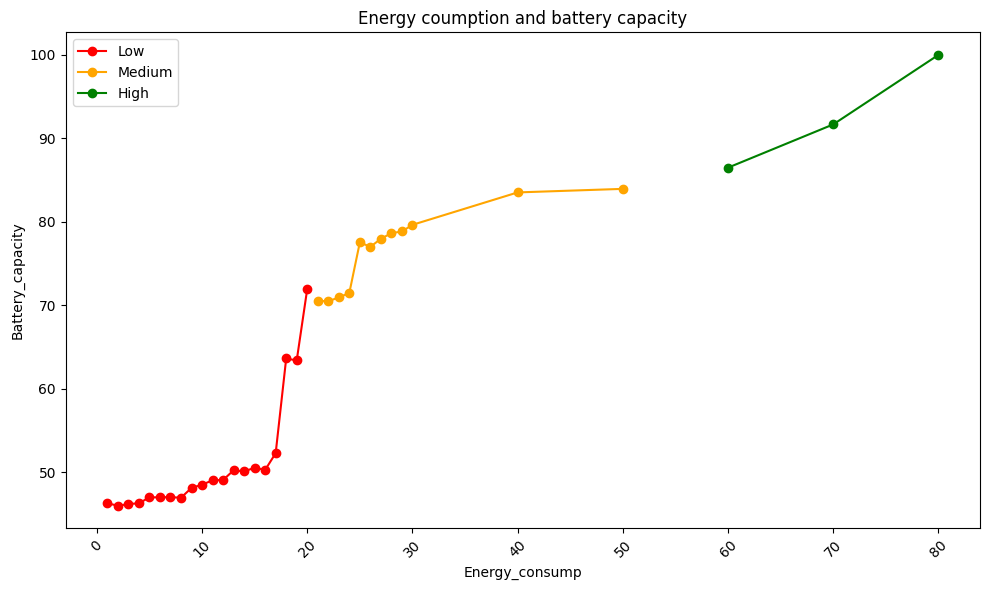

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data is in a DataFrame called 'df'

# Grouping data by Registration Year and calculating the average Energy_consump and Energy_Levels
yearly_energy = df3.groupby('Energy_consump').agg({'Battery_capacity': 'mean', 'Energy_Level': 'first'})

# Sorting the data by Registration Year
yearly_energy = yearly_energy.sort_index()

# Plotting the line chart with different colors or markers for each Energy_Level
plt.figure(figsize=(10, 6))
colors = ['red', 'orange', 'green']  # Color for each energy level

for level, color in zip(yearly_energy['Energy_Level'].unique(), colors):
    data = yearly_energy[yearly_energy['Energy_Level'] == level]
    plt.plot(data.index, data['Battery_capacity'], marker='o', color=color, label=level)

# Adding labels and title to the plot
plt.xlabel('Energy_consump')
plt.ylabel('Battery_capacity')
plt.title('Energy coumption and battery capacity')
energy_levels = ['Low', 'Medium', 'High']
plt.legend(energy_levels)  # Show legend with energy levels

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Distance travel by number of cars
#split date time an plot by year

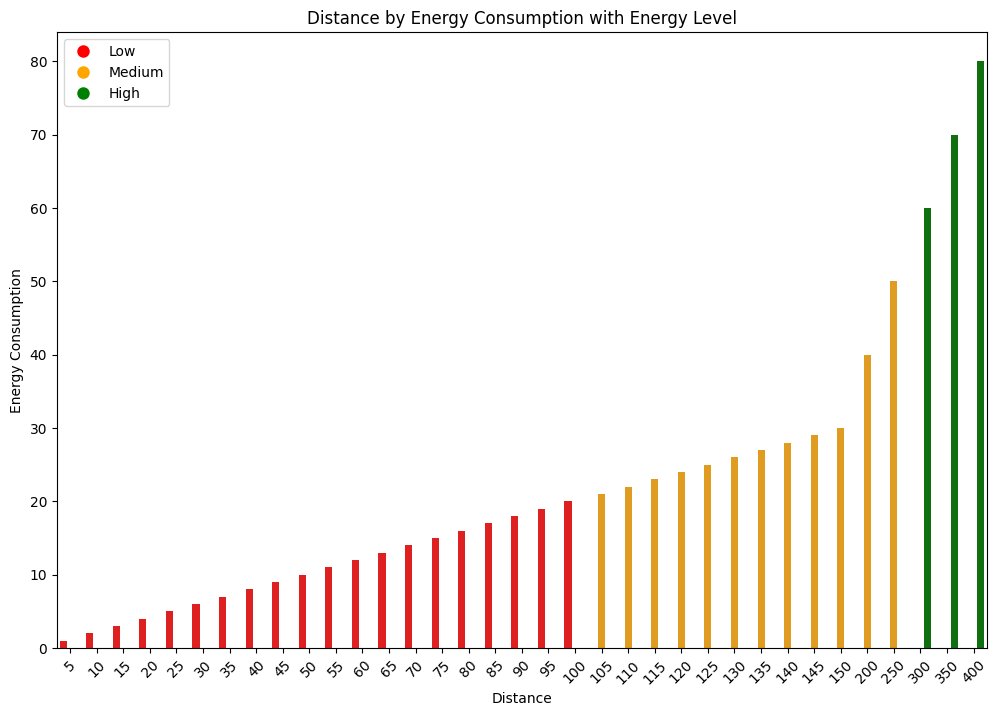

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# colormap based on the 'Energy_Level' values
plt.figure(figsize=(12, 8))
colormap = ['red', 'orange', 'green']

# Plot of the attributes using target as the legend
sns.barplot(x='Distance', y='Energy_consump', data=df3, hue='Energy_Level', palette=colormap)

# Adding labels and title to the plot
plt.xlabel('Distance')
plt.ylabel('Energy Consumption')
plt.title('Distance by Energy Consumption with Energy Level')
plt.xticks(rotation=45)

# custom legend
energy_levels = ['Low', 'Medium', 'High']
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap[i], markersize=10) for i in range(len(energy_levels))]

plt.legend(legend_labels, energy_levels)

plt.show()



MACHINE LEARNING

The data was converted into numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder

Electric_vehicles = pd.DataFrame(df3)

# Columns to convert
object_columns = ["Reg_num", "Manufacturer", "Model", "Reg_year"]

# Convert object_columns to numerical using LabelEncoder
Electric_encoder = LabelEncoder()
for column in object_columns:
    Electric_vehicles[column] = Electric_encoder.fit_transform(Electric_vehicles[column])

print(Electric_vehicles)


       Reg_num  Manufacturer  Model  Reg_year  Battery_capacity  EV_type  \
39        8588             1     29      1241               5.0        1   
40        8583             1     29      1241               5.0        1   
41        8587             1     29      1241               5.0        1   
42        8585             1     29      1241               5.0        1   
43        8586             1     29      1241               5.0        1   
...        ...           ...    ...       ...               ...      ...   
10907      852            17     21        74              20.0        1   
10908     1088            17     21        40              20.0        1   
10909     1484            17     21       921              20.0        1   
10910     3679            17     18      1431              24.2        1   
10911     7370            17     21       442              20.0        1   

       Energy_consump  Distance  Initial SOC (kWh)  \
39                  1         5  

In [ ]:
EVs = Electric_vehicles.drop(['EV_type'], axis=1)

In [ ]:
EVs.head()

,Reg_num,Manufacturer,Model,Reg_year,Battery_capacity,Energy_consump,Distance,Initial SOC (kWh),Socioeconomic Behavior Index,Energy_Level
39,8588,1,29,1241,5.0,1,5,4.143145,2,0
40,8583,1,29,1241,5.0,2,10,4.092420,0,0
41,8587,1,29,1241,5.0,2,10,3.924817,2,0
42,8585,1,29,1241,5.0,3,15,4.082608,2,0
43,8586,1,29,1241,5.0,3,15,4.130632,4,0


In [ ]:
correlation_matrix = EVs.corr()
correlation_matrix

,Reg_num,Manufacturer,Model,Reg_year,Battery_capacity,Energy_consump,Distance,Initial SOC (kWh),Socioeconomic Behavior Index,Energy_Level
Reg_num,1.000000,-0.165094,-0.057687,0.015323,-0.263050,-0.035504,-0.035504,-0.262728,0.011910,-0.035331
Manufacturer,-0.165094,1.000000,0.341260,0.099300,0.551858,0.257207,0.257207,0.551633,0.011181,0.131762
Model,-0.057687,0.341260,1.000000,0.074465,0.295827,0.110336,0.110336,0.295677,-0.002813,0.073603
Reg_year,0.015323,0.099300,0.074465,1.000000,0.022069,0.029012,0.029012,0.022280,0.006242,0.016263
Battery_capacity,-0.263050,0.551858,0.295827,0.022069,1.000000,0.240397,0.240397,0.999581,0.012536,0.241373
Energy_consump,-0.035504,0.257207,0.110336,0.029012,0.240397,1.000000,1.000000,0.240288,0.007810,0.785789
Distance,-0.035504,0.257207,0.110336,0.029012,0.240397,1.000000,1.000000,0.240288,0.007810,0.785789
Initial SOC (kWh),-0.262728,0.551633,0.295677,0.022280,0.999581,0.240288,0.240288,1.000000,0.012644,0.241285
Socioeconomic Behavior Index,0.011910,0.011181,-0.002813,0.006242,0.012536,0.007810,0.007810,0.012644,1.000000,0.008412
Energy_Level,-0.035331,0.131762,0.073603,0.016263,0.241373,0.785789,0.785789,0.241285,0.008412,1.000000


<Axes: >

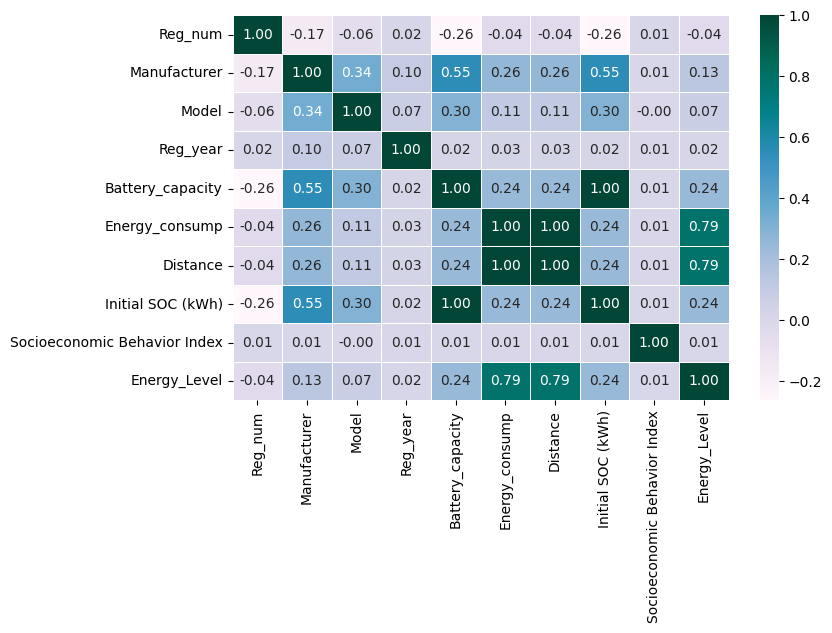

In [ ]:
correlation_matrix = EVs.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="PuBuGn")


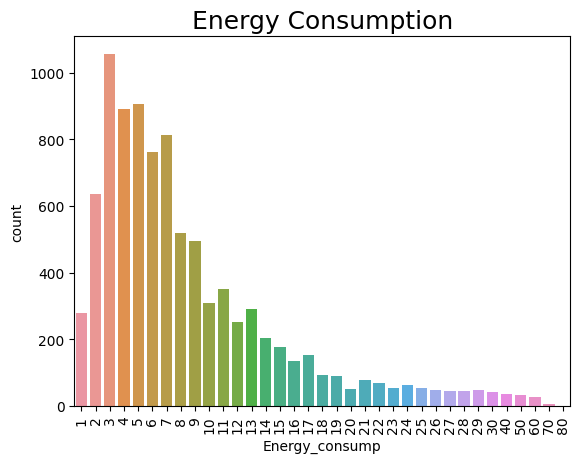

In [ ]:

from matplotlib import rcParams
sns.countplot(x="Energy_consump", data=EVs)
rcParams['figure.figsize'] = 7.5, 8.5
plt.xticks(rotation=90)
plt.title('Energy Consumption', fontsize=18)
plt.show()

**DATA PRE-PROCESSING**

In [ ]:
# set up random seed and create the X and y (train and test datasets)
np.random.seed(42)
X = EVs.drop(["Energy_Level"], axis=1)
y = EVs["Energy_Level"]
X.head()

,Reg_num,Manufacturer,Model,Reg_year,Battery_capacity,Energy_consump,Distance,Initial SOC (kWh),Socioeconomic Behavior Index
39,8588,1,29,1241,5.0,1,5,4.143145,2
40,8583,1,29,1241,5.0,2,10,4.092420,0
41,8587,1,29,1241,5.0,2,10,3.924817,2
42,8585,1,29,1241,5.0,3,15,4.082608,2
43,8586,1,29,1241,5.0,3,15,4.130632,4


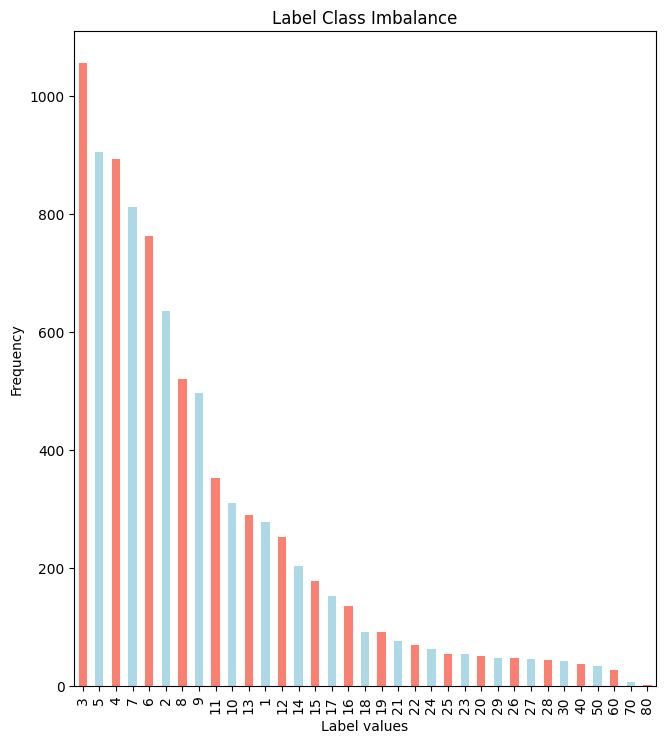

In [ ]:
# imbalance of labels
EVs. Energy_consump.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.title('Label Class Imbalance')
plt.xlabel('Label values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


SMOTE ANALYSIS

In [ ]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
# Scaling the data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
EVs_scaler = scaler.fit(X_train)
EVs_X_train = EVs_scaler.transform(X_train)
EVs_X_test = EVs_scaler.transform(X_test)

In [ ]:
# Balancing the data sets
from imblearn.over_sampling import RandomOverSampler
electric = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = electric.fit_resample(EVs_X_train, y_train)



In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Scaling the data set
scaler = StandardScaler()
EVs_scaler = scaler.fit(X_train)
EVs_X_train = EVs_scaler.transform(X_train)
EVs_X_test = EVs_scaler.transform(X_test)

# Balancing the data sets
electric = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = electric.fit_resample(EVs_X_train, y_train)

y_train.value_counts = y_train_resampled.value_counts()
print(y_train.value_counts)


0    6770
1    6770
2    6770
Name: Energy_Level, dtype: int64


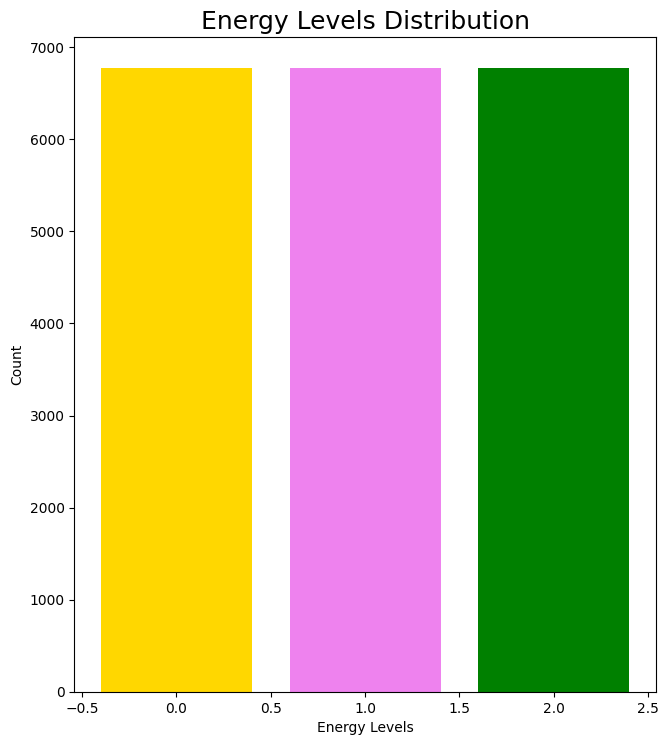

In [ ]:
import matplotlib.pyplot as plt
energy_counts = y_train.value_counts
colors = ['gold', 'violet', 'green']
plt.bar(energy_counts.index, energy_counts.values, color=colors)
plt.title('Energy Levels Distribution', fontsize=18)
plt.xlabel('Energy Levels')
plt.ylabel('Count')
plt.show()


MODELS


XGBoost: **Extreme** Gradien**t Boosting Classifier**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=5)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict the labels on the test data
xgb_pred = xgb_model.predict(EVs_X_test)

# Calculate accuracy score
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate cross-validation score
xgb_cross_validation = cross_val_score(xgb_model, X_train, y_train, cv=5).mean()

# Calculate confusion matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)

# Print the results
print("XGBoost Accuracy Score:", xgb_accuracy * 100, "\n")
print("XGBoost Cross Validation Score:", xgb_cross_validation * 100, "\n")
print("Confusion Matrix:\n", xgb_conf_matrix, "\n")
print("Classification Report:\n", classification_report(y_test, xgb_pred))


XGBoost Accuracy Score: 92.92375205704883 

XGBoost Cross Validation Score: 100.0 

Confusion Matrix:
 [[1694    0    0]
 [ 124    0    0]
 [   5    0    0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1694
           1       0.00      0.00      0.00       124
           2       0.00      0.00      0.00         5

    accuracy                           0.93      1823
   macro avg       0.31      0.33      0.32      1823
weighted avg       0.86      0.93      0.90      1823



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


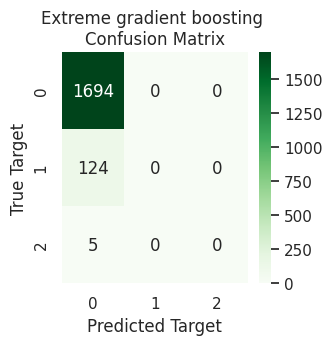

In [ ]:
sns.set(font_scale=1)

def confmat(y_test, xgb_pred):
    """
    Plots a confusion matrix for Logistic Regression.
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, xgb_pred),
                     annot=True, # Annotate the boxes
                     cmap='Greens', fmt='g')
    plt.xlabel("Predicted Target") # predictions go on the x-axis
    plt.ylabel("True Target") # true labels go on the y-axis
    plt.title("Extreme gradient boosting \nConfusion Matrix")
confmat(y_test,xgb_pred)

**KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels on the test data
knn_pred = knn_classifier.predict(EVs_X_test)

# Calculate accuracy score
knn_accuracy = accuracy_score(y_test, knn_pred)

# Calculate cross-validation score
knn_cross_validation = cross_val_score(knn_classifier, X_train, y_train, cv=5).mean()

# Calculate confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_pred)

# Print the results
print("KNN Accuracy Score:", knn_accuracy * 100, "\n")
print("KNN Cross Validation Score:", knn_cross_validation * 100, "\n")
print("Confusion Matrix:\n", knn_conf_matrix, "\n")
print("Classification Report:\n", classification_report(y_test, knn_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN Accuracy Score: 92.92375205704883 

KNN Cross Validation Score: 95.48696844993142 

Confusion Matrix:
 [[1694    0    0]
 [ 124    0    0]
 [   5    0    0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1694
           1       0.00      0.00      0.00       124
           2       0.00      0.00      0.00         5

    accuracy                           0.93      1823
   macro avg       0.31      0.33      0.32      1823
weighted avg       0.86      0.93      0.90      1823



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


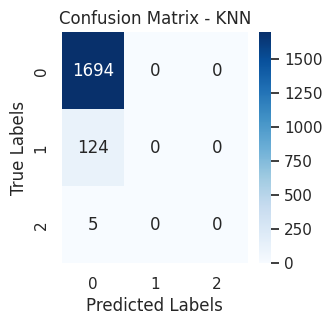

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - KNN")
plt.show()


## **LINEAR SUPPORT VECTOR CLASSIFIER: SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Initialize the SVM model
svm_model = SVC(random_state=5)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict the labels on the test data
svm_pred = svm_model.predict(EVs_X_test)

# Calculate accuracy score
svm_accuracy = accuracy_score(y_test, svm_pred)

# Calculate cross-validation score
svm_cross_validation = cross_val_score(svm_model, X_train, y_train, cv=5).mean()

# Calculate confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

# Print the results
print("SVM Accuracy Score:", svm_accuracy * 100, "\n")
print("SVM Cross Validation Score:", svm_cross_validation * 100, "\n")
print("Confusion Matrix:\n", svm_conf_matrix, "\n")
print("Classification Report:\n", classification_report(y_test, svm_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


SVM Accuracy Score: 92.92375205704883 

SVM Cross Validation Score: 92.86694101508918 

Confusion Matrix:
 [[1694    0    0]
 [ 124    0    0]
 [   5    0    0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1694
           1       0.00      0.00      0.00       124
           2       0.00      0.00      0.00         5

    accuracy                           0.93      1823
   macro avg       0.31      0.33      0.32      1823
weighted avg       0.86      0.93      0.90      1823



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


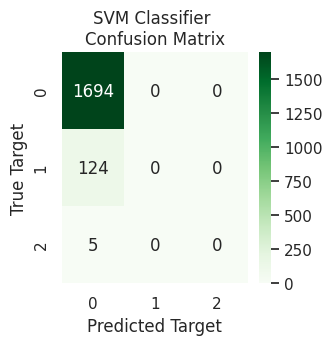

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def confmat(y_test, svm_pred):
    """
    Plots a confusion matrix for SVM classifier.
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, svm_pred),
                     annot=True, # Annotate the boxes
                     cmap='Greens', fmt='g')
    plt.xlabel("Predicted Target") # predictions go on the x-axis
    plt.ylabel("True Target") # true labels go on the y-axis
    plt.title("SVM Classifier \nConfusion Matrix")

confmat(y_test, svm_pred)


### **LOGISTIC REGRESSION **

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Initialize the logistic regression model
logreg_model = LogisticRegression(random_state=5)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict the labels on the test data
logreg_pred = logreg_model.predict(EVs_X_test)

# Calculate accuracy score
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Calculate cross-validation score
logreg_cross_validation = cross_val_score(logreg_model, X_train, y_train, cv=5).mean()

# Calculate confusion matrix
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

# Print the results
print("Logistic Regression Accuracy Score:", logreg_accuracy * 100, "\n")
print("Logistic Regression Cross Validation Score:", logreg_cross_validation * 100, "\n")
print("Confusion Matrix:\n", logreg_conf_matrix, "\n")
print("Classification Report:\n", classification_report(y_test, logreg_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepro

Logistic Regression Accuracy Score: 59.736697750959955 

Logistic Regression Cross Validation Score: 96.88614540466392 

Confusion Matrix:
 [[1016   90  588]
 [   0   68   56]
 [   0    0    5]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75      1694
           1       0.43      0.55      0.48       124
           2       0.01      1.00      0.02         5

    accuracy                           0.60      1823
   macro avg       0.48      0.72      0.42      1823
weighted avg       0.96      0.60      0.73      1823



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

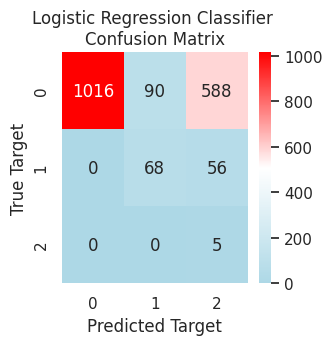

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def confmat(y_test, logreg_pred):
    """
    Plots a confusion matrix for logistic regression classifier.
    """
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("Custom", ['#add8e6', 'white', 'red'])

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, logreg_pred),
                     annot=True,  # Annotate the boxes
                     cmap=custom_cmap,  # Use the custom colormap
                     fmt='g')
    plt.xlabel("Predicted Target")  # predictions go on the x-axis
    plt.ylabel("True Target")  # true labels go on the y-axis
    plt.title("Logistic Regression Classifier \nConfusion Matrix")

confmat(y_test, logreg_pred)


# **NAIVE BAYES CLASSIFIER**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Predict the labels on the test data
nb_pred = nb_model.predict(EVs_X_test)

# Calculate accuracy score
nb_accuracy = accuracy_score(y_test, nb_pred)

# Calculate cross-validation score
nb_cross_validation = cross_val_score(nb_model, X_train, y_train, cv=5).mean()

# Calculate confusion matrix
nb_conf_matrix = confusion_matrix(y_test, nb_pred)

# Print the results
print("Naive Bayes Accuracy Score:", nb_accuracy * 100, "\n")
print("Naive Bayes Cross Validation Score:", nb_cross_validation * 100, "\n")
print("Confusion Matrix:\n", nb_conf_matrix, "\n")
print("Classification Report:\n", classification_report(y_test, nb_pred))


Naive Bayes Accuracy Score: 92.92375205704883 

Naive Bayes Cross Validation Score: 95.3360768175583 

Confusion Matrix:
 [[1694    0    0]
 [ 124    0    0]
 [   5    0    0]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1694
           1       0.00      0.00      0.00       124
           2       0.00      0.00      0.00         5

    accuracy                           0.93      1823
   macro avg       0.31      0.33      0.32      1823
weighted avg       0.86      0.93      0.90      1823



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Us

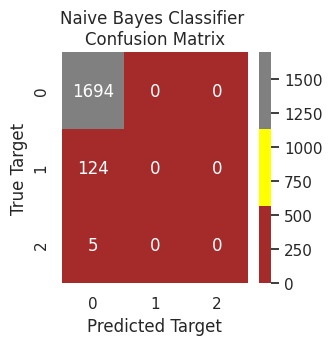

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def confmat(y_test, nb_pred):
    """
    Plots a confusion matrix for Naive Bayes classifier.
    """
    custom_cmap = sns.color_palette(['brown', 'yellow', 'grey'])

    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, nb_pred),
                     annot=True,  # Annotate the boxes
                     cmap=custom_cmap, fmt='g')
    plt.xlabel("Predicted Target")  # predictions go on the x-axis
    plt.ylabel("True Target")  # true labels go on the y-axis
    plt.title("Naive Bayes Classifier \nConfusion Matrix")


confmat(y_test, nb_pred)

FEATURE IMPORTANCE TO THE MODEL

In [ ]:
features_dict = dict(zip(EVs.columns, list(logreg_model.coef_[0])))
sort_f = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)
sort_fd = pd.DataFrame(sort_f, columns=['Feature', 'Coefficient'])
sort_fd

,Feature,Coefficient
0,Model,0.141796
1,Manufacturer,0.086344
2,Socioeconomic Behavior Index,0.014873
3,Battery_capacity,0.014680
4,Initial SOC (kWh),0.011931
5,Reg_year,0.002297
6,Reg_num,0.000292
7,Energy_consump,-0.015723
8,Distance,-0.078615


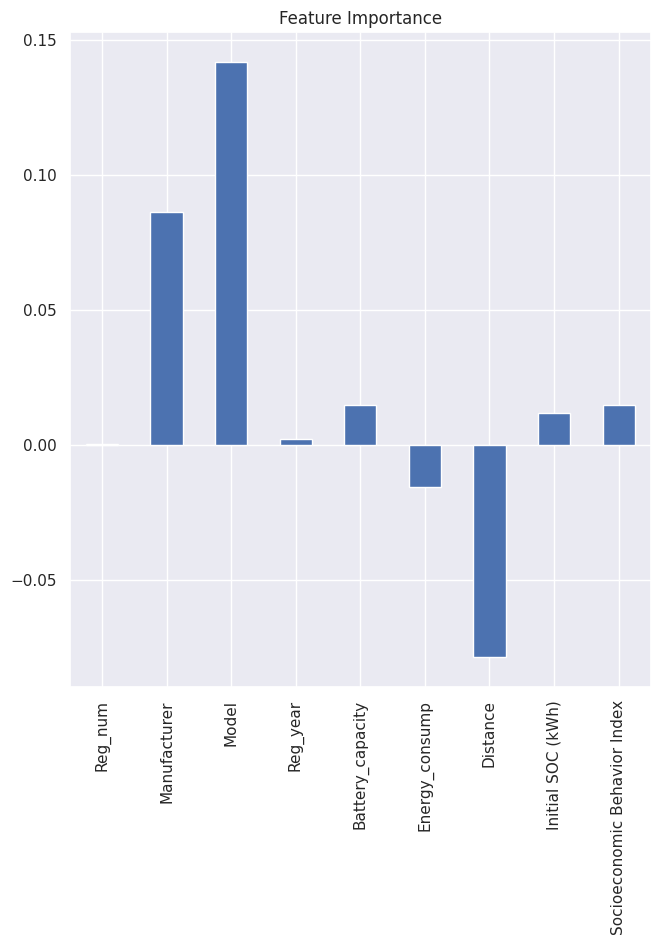

In [ ]:
# Visualize feature importance##### this is the coeffiecient of the model.
sort_fd = pd.DataFrame(features_dict, index=[0])
sort_fd.T.plot.bar(title="Feature Importance", legend=False);####the bar above postively influenced the model/ or positive correlation btw the attributes and the model output
#####/target variables. the larger the bar, the more the feature contributes to the model desici

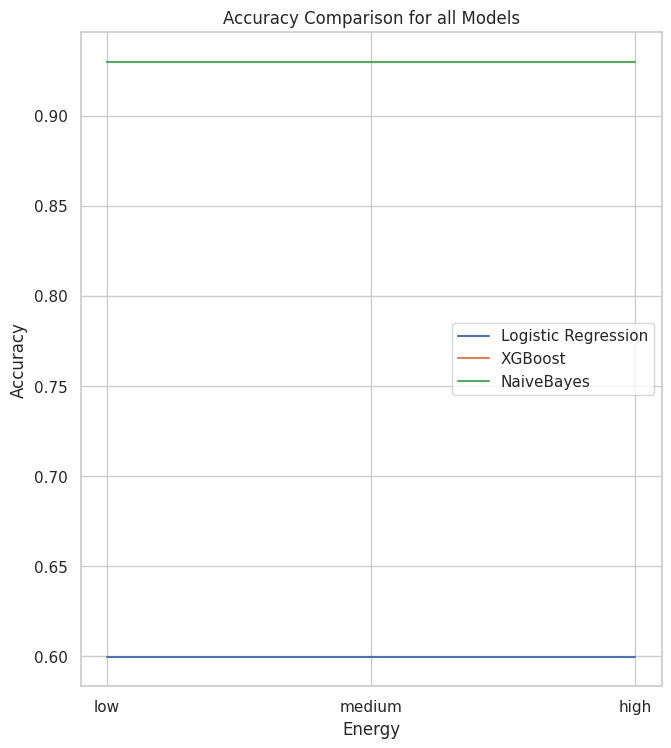

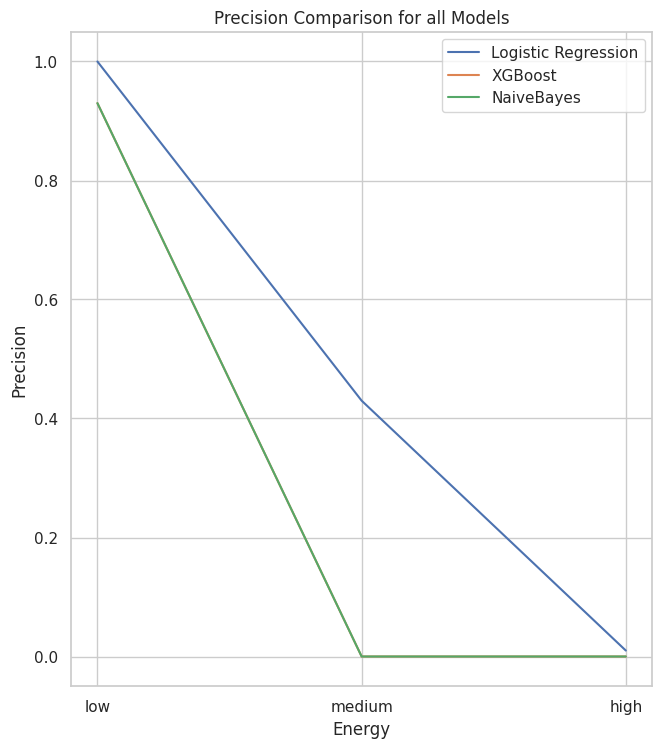

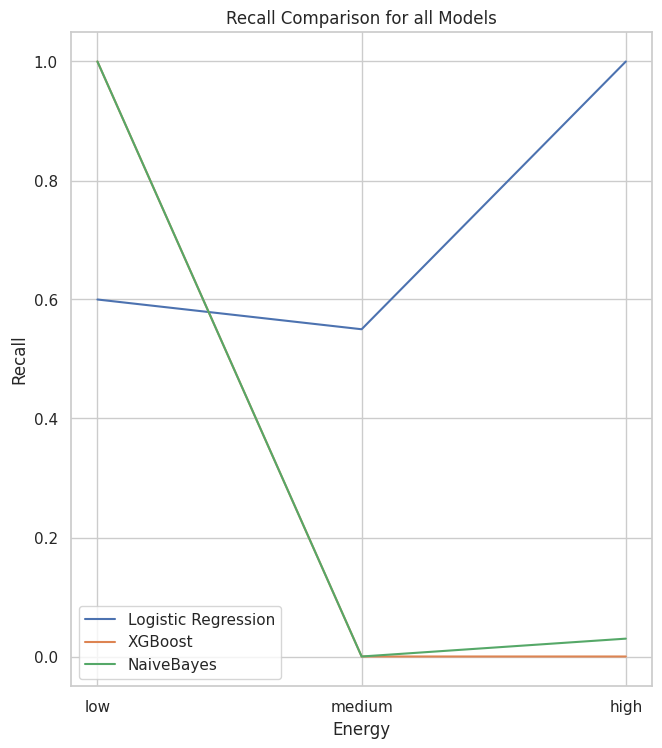

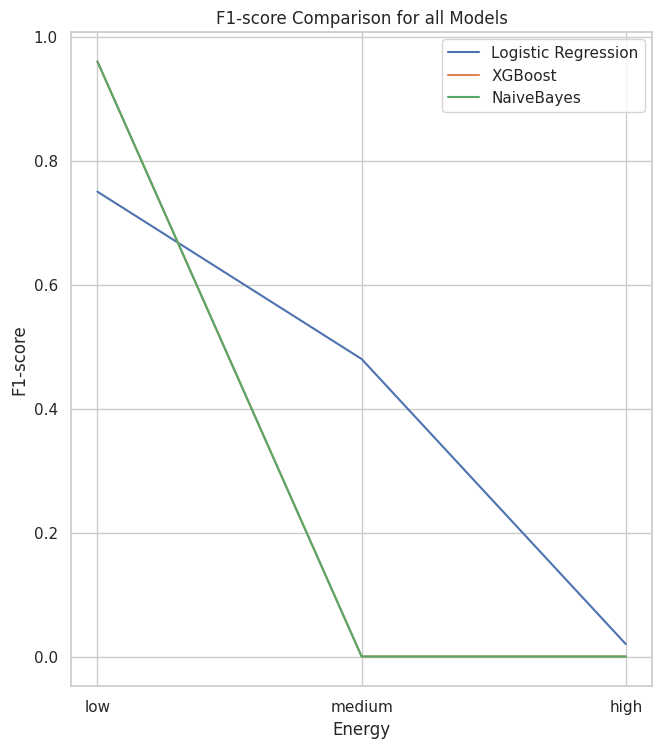

In [ ]:
from sklearn import naive_bayes
####classification Report
import seaborn as sns
sns.set(style="whitegrid")
# Define the classes and metrics you want to plot
targets = ['low', 'medium', 'high']
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

# Define the metrics for all models
xgb_metrics = {
    'accuracy': [0.93, 0.93, 0.93],
    'precision': [0.93, 0.00, 0.00],
    'recall': [1.00, 0.00, 0.00],
    'f1-score': [0.96, 0.00, 0.00]
}

logreg_metrics = {
    'accuracy': [0.60, 0.60, 0.60],
    'precision': [1.00, 0.43, 0.01],
    'recall': [0.60, 0.55, 1.00],
    'f1-score': [0.75, 0.48, 0.02]
}
naive_bayes_metrics = {
    'accuracy': [0.93, 0.93, 0.93],
    'precision': [0.93, 0.00, 0.00],
    'recall': [1.00, 0.00, 0.03],
    'f1-score': [0.96, 0.00, 0.00]
}

for metric in metrics:
    sns.lineplot(x=targets, y=logreg_metrics[metric], label='Logistic Regression')
    sns.lineplot(x=targets, y=xgb_metrics[metric], label='XGBoost')
    sns.lineplot(x=targets, y=naive_bayes_metrics[metric], label='NaiveBayes')
    plt.xlabel('Energy')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} Comparison for all Models')
    plt.legend()
    plt.show()


